In [1]:
import pandas as pd
import numpy as np
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import imp
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import leidenalgorithm_implementation as li
import semiannotate 

In [3]:
# load data
# darmanis brain atlas
BA_count_path = '../leidenalg/Datasets/Darmanis_Brain/All_cell_counts_brain.csv'
BA_counttable = pd.read_csv(BA_count_path,index_col=0)
BA_meta = pd.read_csv('../leidenalg/Datasets/Darmanis_Brain/All_cell_info_brain.csv',sep=';',index_col=0)

#darmanis glioblastoma dataset (to annotate based on brain atlas)
GBM_count_path = '../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_raw_gene_counts.csv'
GBM_counttable = pd.read_csv(GBM_count_path,sep=' ',index_col=0)
GBM_meta = pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_metadata.csv',sep=' ',index_col=0)
GBMtsne = pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GBM_TSNE.csv',sep=' ',index_col=0)
GBM_meta = GBM_meta.join(GBMtsne)
# add annotation from separate file
GBMmeta2= pd.read_csv('../leidenalg/Datasets/Darmanis_Glioblastoma/GBM_data_and_metadata/GEO_upload/spyros.darmanis_metadata_GBM.csv',index_col=0)
GBM_meta = GBM_meta.join(GBMmeta2['characteristics: cell type'])
GBM_meta.rename(index=str,columns={'characteristics: cell type':'Cell_type'},inplace=True)

In [4]:
imp.reload(li)
keys = ['cell type column','number of features cell type','number of features new data']
values = ['Cell_type',30,500]
kwds = dict(zip(keys,values))
matrix,weights, BA_meta,GBM_meta = li.normmerge_twoCounttables(BA_counttable,
                                                                             BA_meta, GBM_counttable, GBM_meta, **kwds)

-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5']
-------------------------------------------
-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC1', 'ERCC2', 'ERCC3', 'ERCC4', 'ERCC5', 'ERCC6', 'ERCC6L', 'ERCC8']
-------------------------------------------
-------------------------------------------
Cell types in atlas:
['Astrocytes' 'Endothelial' 'Fetal_quiescent' 'Fetal_replicating'
 'Microglia' 'Neurons' 'OPC' 'Oligodendrocytes' 'hybrid' 'hybrids']
-------------------------------------------
Cell types in new data:
['Astocyte' 'Immune cell' 'Neoplastic' 'Neuron' 'OPC' 'Oligodendrocyte'
 'Vascular']
-------------------------------------------


In [6]:
imp.reload(li)
matrix_feature_selected = li.feature_select(matrix.dropna(how='all',axis=1),BA_meta,**kwds)

-------------------------------------------
Selected number of genes from atlas:
300
-------------------------------------------
Selected number of genes from new cells:
500
-------------------------------------------
Combined total of selected genes:
787
-------------------------------------------


In [22]:
imp.reload(li)
keys = ['cell type column','number of features cell type','number of features new data',
        'threshold_neigborhood','n_pcs','resolution_parameter','self_edging']
values = ['Cell_type',30,500,.7,20,.001,False]
kwds = dict(zip(keys,values))
tsnedf, class_numbers,vals,dm,wdm = li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_meta,GBM_meta,**kwds)

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


NameError: name 'n_pcs' is not defined

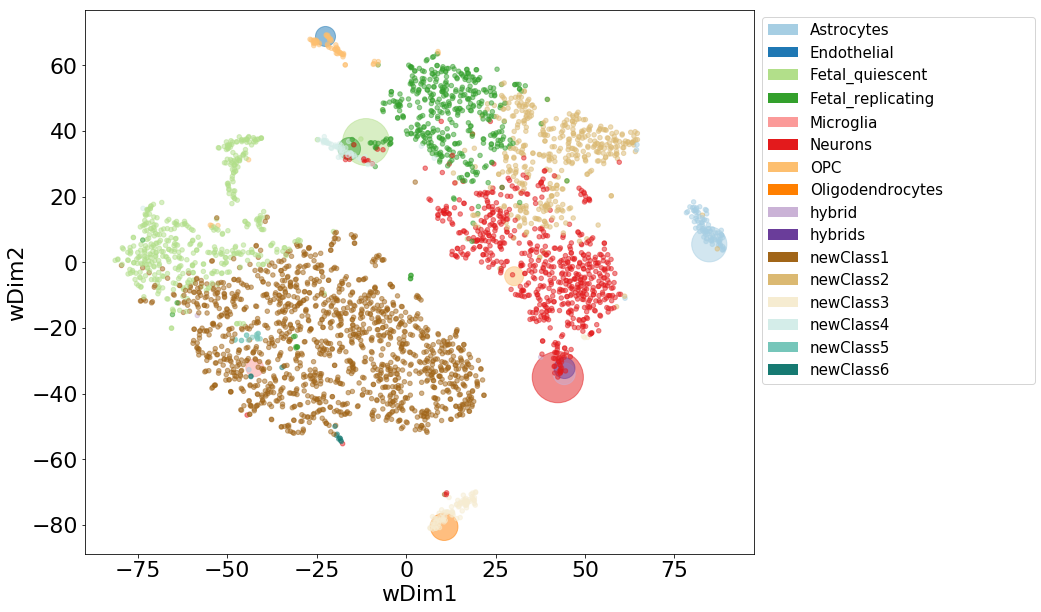

In [15]:
newlut = dict(zip(class_numbers,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(class_numbers)-10)))
newcolor = tsnedf['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,vals,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotateSE_tSNE_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

In [12]:
imp.reload(li)
imp.reload(semiannotate)
keys = ['cell type column','number of features cell type','number of features new data',
        'threshold_neigborhood','n_pcs','resolution_parameter','self_edging']
values = ['Cell_type',30,500,.7,20,.001,True]
kwds = dict(zip(keys,values))
tsnedfSE, class_numbersSE,valsSE= li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_meta,GBM_meta,**kwds)

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


NameError: name 'n_pcs' is not defined

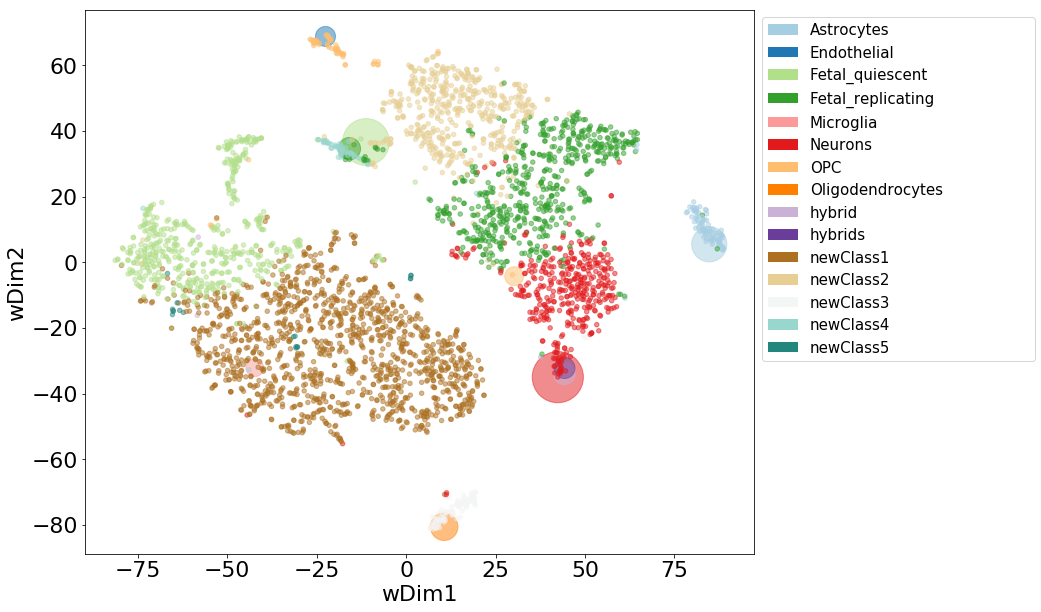

In [13]:
newlut = dict(zip(class_numbersSE,sns.color_palette('Paired', 10)+sns.color_palette('BrBG',len(class_numbers)-10)))
newcolor = tsnedfSE['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedfSE.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('weighted PCA, n_pcs='+str(n_pcs)+', thresNeigh='+str(thresn)+' respar='+str(respar))
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig('../leidenalg/Datasets/Darmanis_Brain/semiAnnotateSE_tSNE_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')

In [25]:
distance_matrix_num = pd.DataFrame(dm)

In [ ]:
for cell in distance_matrix_num.index:
        valshort = list(distance_matrix_num.loc[cell].sort_values(ascending=True)[1:NNeighbors].values)
        valthresidx = [valshort.index(x) for x in valshort if x>.2]
        inxshort = list(distance_matrix_num.loc[cell].sort_values(ascending=False)[1:NNeighbors].index)
        idxthres = [inxshort[x] for x in valthresidx] # add only pairs with correlation >.2
        indices.append(idxthres)
        values.append(valshort)
        for i in range(len(idxthres)):
            pairs.append((cell,indices[cell][i]))

In [34]:
distance_matrix_num.shape


(3589, 3599)